## Introduction 

### Background information

In the post-epidemic era, the covid-19 outbreak has had a significant economic impact on the banking industry, especially on small commercial investment banks. The safety and stability of banks are major public policy concerns, and government policies aim to limit these bank failures and the economic crisis.
Banking institutions not only need support from the government, but their own business development needs to be adjusted to mitigate the economic impact from epidemic.
Although banks can do many things, their main task is to take money (called deposits) from those who have it, take it in, and lend it to those who need it. That's why it's important to adapt marketing strategies that attract customers to make term deposits.

This data is a classic bank marketing dataset uploaded in the UCI machine learning repository. So we would like to analyze the marketing campaign data of this banking institution to simulate a realistic bank marketing campaign design exercise.


### Dataset Overview
The data set for the Capstone Project is the Bank Marketing Dataset from https://archive.ics.uci.edu/ml/datasets/bank+marketing#

Bank.csv with 10% of all the collecting examples (includes 11162 records) and 17 useable features.

17 useable attributes include 16 Input variables and one Output variable

Input variables:

bank client information data:

•age (numeric)

•job: type of job

•marital: marital status

•education categorical

•default: has credit in default? 

•balance: current balance in the account

•housing: has housing loan? 

•loan: has personal loan?

Related with the last contact of the current campaign:

•contact: contact communication type 

•month: last contact month of year 

•day_of_week: last contact day of the week 

•duration: last contact duration, in seconds (numeric)

•campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

•pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

•previous: number of contacts performed before this campaign and for this client (numeric)

•poutcome: outcome of the previous marketing campaign 

Output variable (desired target):

•deposit: has the client subscribed a term deposit after first round campagin? (binary: 'yes', 'no')


### Problem we hope to solve with our analysis:
1. The data relates to the direct marketing activities of a Portuguese banking institution. These marketing activities are telephone based. Typically, more than one contact is made with the same customer to find out whether the bank's Term Deposit will be subscribed.
2. Due to the limitations of telemarketing, how to divide the customers into different groups so that the banking institution can develop a more targeted marketing strategy for term deposits to different groups.
3. Create different classification models based on the information from the banking institution's marketing campaigns and the customer's personal information to predict whether the customer will make Term Deposit Suscriptions in future marketing campaigns and compare the models to determine which model makes the most accurate prediction.


In [1]:
# Import libraries

import pandas as pd
import numpy as np

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from group_3_capstone_project_lib import deposit_sum_by_column, add_factor_to_deposit_sum_by_job, \
#t_weightstates_on_feature, evaluate_model

from statsmodels.stats import weightstats as weightstats

## Exploratory Data Analysis

### Data Pre-Processing

In [2]:
# Load dataset
bank = pd.read_csv('https://raw.githubusercontent.com/paulista8/bank.csv/main/bank.csv')

print('Shape of dataframe:', bank.shape)
bank.head()

Shape of dataframe: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### Describe the dataset

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# numerical statistic description
data_numeric = bank.select_dtypes(include='int64')
col_num = data_numeric.columns
bank[col_num].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#### Class Distribution
Another important thing to make sure before use our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [5]:
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

#### Data cleanup

In [6]:
# Checking unkown data percetage
bank.isin(['unknown']).mean()

age          0.000000
job          0.006271
marital      0.000000
education    0.044526
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.210177
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.745924
deposit      0.000000
dtype: float64

After examining the dataset, it looks quite good and requires minimal processing. We do need to make some simple adjustments for the unknown values. 
 *'job', 'education', and 'contact' columns：we can fill in the missing values with the mode. 
 *‘poutcome': Due to the large number of missing values in the 'poutcome' column (the outcome of the previous communication), we can choose to discard this feature

In [7]:
#Removing 'poutcome' column
bank.drop(['poutcome'],inplace=True,axis=1)

#Replace unknown value with mode
bank['job'].replace(['unknown'],bank['job'].mode(),inplace=True)
bank['education'].replace(['unknown'],bank['education'].mode(),inplace=True)
bank['contact'].replace(['unknown'],bank['contact'].mode(),inplace=True)

In [8]:
#Examine duplicated value, if TRUE then delete it 
bank.duplicated().any()  

False

In [9]:
#Check missing value 
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

### Data visualization

<Axes: xlabel='deposit', ylabel='count'>

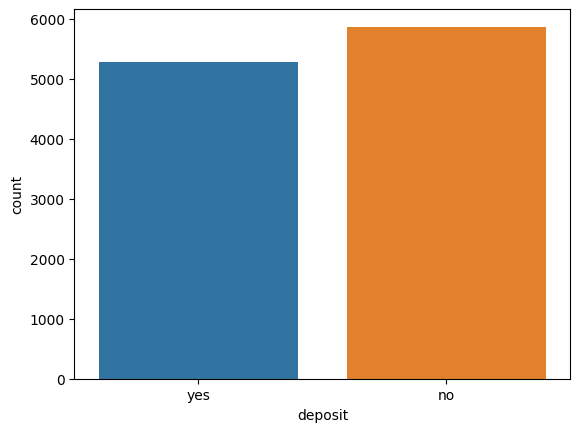

In [10]:
#### Check the distribution of depositing after campaign
sns.countplot(x='deposit',data=bank)

Interpretation:This dataset has a balanced 'deposit' column, ready to use model to analysis 

#### Comparing different job's deposit data

In [11]:
def deposit_sum_by_column(bank, column_name):
    """
    This function calculates the deposit ratio for each category in the specified column 
    and visualizes the results using a bar plot.
    
    Parameters:
    bank (pd.DataFrame): The bank marketing dataset in a pandas DataFrame.
    column_name (str): The name of the column for which the deposit ratio should be calculated.
    """
  
    # Filter out only rows with 'yes' deposits and group by the specified column
    deposit_sum_by_column = bank[bank['deposit'] == 'yes'].groupby([column_name]).size().reset_index(name='count')

    # Calculate the total number of instances for each category in the specified column
    total_by_column = bank.groupby([column_name]).size().reset_index(name='total')

    # Merge the two DataFrames on the specified column
    deposit_sum_by_column = deposit_sum_by_column.merge(total_by_column, on=column_name)

    # Calculate the deposit ratio and add it as a new column
    deposit_sum_by_column['deposit_ratio'] = deposit_sum_by_column['count'] / deposit_sum_by_column['total']

    # Print the resulting DataFrame
    print(deposit_sum_by_column)

    # Visualize the results using a bar plot
    sns.set_theme(style="whitegrid")
    sns.barplot(x=column_name, y="deposit_ratio", data=deposit_sum_by_column)
    plt.xlabel(f"{column_name} category")
    plt.ylabel("Deposit ratio")
    plt.title(f"Deposit ratio by {column_name}")
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()
    
    return


              job  count  total  deposit_ratio
0          admin.    631   1334       0.473013
1     blue-collar    708   1944       0.364198
2    entrepreneur    123    328       0.375000
3       housemaid    109    274       0.397810
4      management   1335   2636       0.506449
5         retired    516    778       0.663239
6   self-employed    187    405       0.461728
7        services    369    923       0.399783
8         student    269    360       0.747222
9      technician    840   1823       0.460779
10     unemployed    202    357       0.565826


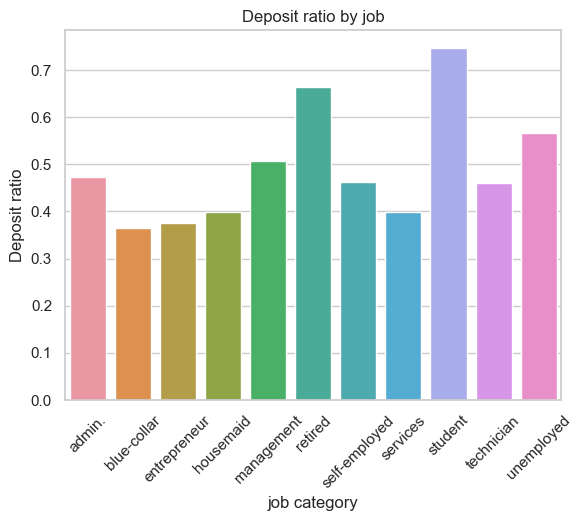

In [12]:
deposit_sum_by_column(bank,'job')

Interpretation: Acceptance ranks from student, retired, unemployed ( > 50% ) 

#### Comparing education level to influence deposit data

   education  count  total  deposit_ratio
0    primary    591   1500       0.394000
1  secondary   2702   5973       0.452369
2   tertiary   1996   3689       0.541068


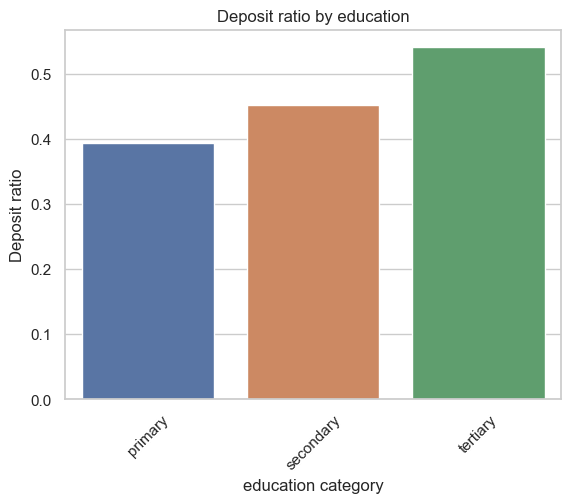

In [13]:
deposit_sum_by_column(bank,'education')

Interpretation: More higer educated, more easy to depositting after bank marketing.

#### Comparing marital status to influence result

    marital  count  total  deposit_ratio
0  divorced    622   1293       0.481052
1   married   2755   6351       0.433790
2    single   1912   3518       0.543491


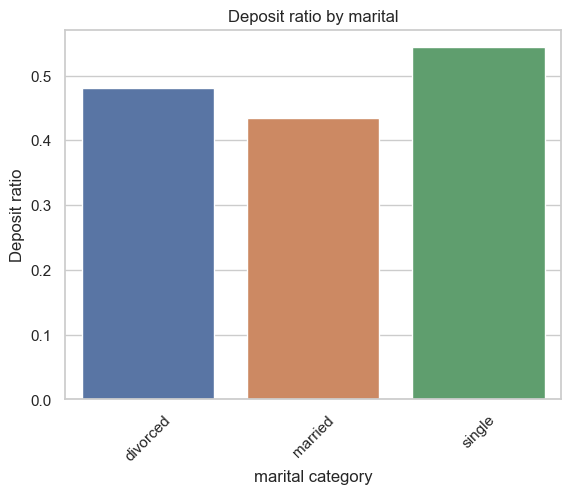

In [14]:
deposit_sum_by_column(bank,'marital')

Interpretation: Single customer has a little bit higher than divorced and married.

#### Two factors ：Add 'marital' factor to job_distrubition 

In [15]:
def add_factor_to_deposit_sum_by_job(bank, column_name):
    """
    This function calculates the deposit ratio for each combination of job and the specified 
    column categories, and visualizes the results using a grouped bar plot.
    
    Parameters:
    bank (pd.DataFrame): The bank marketing dataset in a pandas DataFrame.
    column_name (str): The name of the column for which the deposit ratio should be calculated.
    """

    # Calculate the number of 'yes' deposits for each combination of job and specified column categories
    deposit_sum_by_job = bank[bank['deposit'] == 'yes'].groupby(['job', column_name]).size().reset_index(name='count')

    # Calculate the total number of instances for each combination of job and specified column categories
    total_by_job = bank.groupby(['job', column_name]).size().reset_index(name='total')

    # Merge the two DataFrames on the 'job' and specified column
    deposit_sum_by_job = deposit_sum_by_job.merge(total_by_job, on=['job', column_name])

    # Calculate the deposit ratio and add it as a new column
    deposit_sum_by_job['deposit_ratio'] = deposit_sum_by_job['count'] / deposit_sum_by_job['total']

    # Print the resulting DataFrame
    print(deposit_sum_by_job)

    # Visualize the results using a grouped bar plot
    sns.set_theme(style="whitegrid")
    sns.barplot(x="job", y="deposit_ratio", hue=column_name, data=deposit_sum_by_job)
    plt.xlabel("Job category")
    plt.ylabel("Deposit ratio")
    plt.title(f"Deposit ratio by job and {column_name} status")
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()
    
    return

              job   marital  count  total  deposit_ratio
0          admin.  divorced     90    182       0.494505
1          admin.   married    306    677       0.451994
2          admin.    single    235    475       0.494737
3     blue-collar  divorced     58    149       0.389262
4     blue-collar   married    437   1335       0.327341
5     blue-collar    single    213    460       0.463043
6    entrepreneur  divorced     15     42       0.357143
7    entrepreneur   married     81    234       0.346154
8    entrepreneur    single     27     52       0.519231
9       housemaid  divorced     18     46       0.391304
10      housemaid   married     67    190       0.352632
11      housemaid    single     24     38       0.631579
12     management  divorced    143    290       0.493103
13     management   married    702   1477       0.475288
14     management    single    490    869       0.563867
15        retired  divorced    121    171       0.707602
16        retired   married    

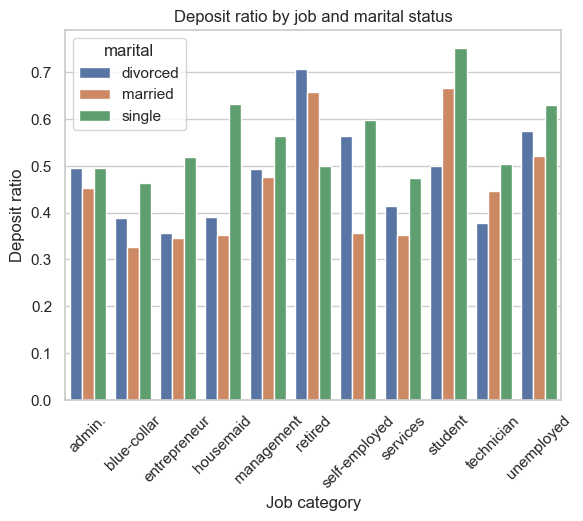

In [16]:
add_factor_to_deposit_sum_by_job(bank,'marital')

Interpretation:single, married student and divorced retired people more willing to make deposit in the bank

              job housing  count  total  deposit_ratio
0          admin.      no    344    594       0.579125
1          admin.     yes    287    740       0.387838
2     blue-collar      no    273    623       0.438202
3     blue-collar     yes    435   1321       0.329296
4    entrepreneur      no     70    162       0.432099
5    entrepreneur     yes     53    166       0.319277
6       housemaid      no     85    198       0.429293
7       housemaid     yes     24     76       0.315789
8      management      no    902   1560       0.578205
9      management     yes    433   1076       0.402416
10        retired      no    464    655       0.708397
11        retired     yes     52    123       0.422764
12  self-employed      no    119    231       0.515152
13  self-employed     yes     68    174       0.390805
14       services      no    184    357       0.515406
15       services     yes    185    566       0.326855
16        student      no    247    309       0.799353
17        

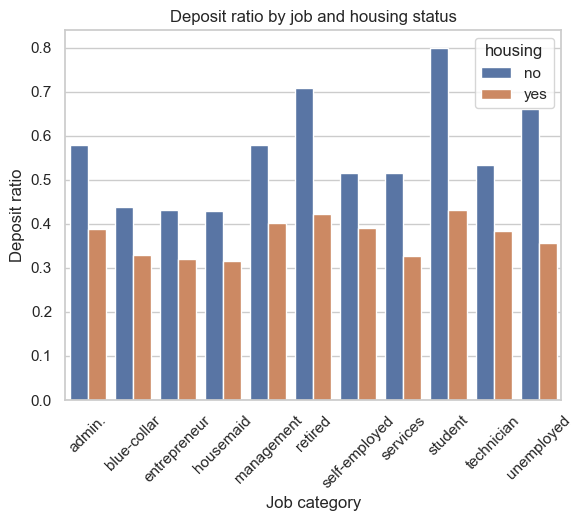

In [17]:
add_factor_to_deposit_sum_by_job(bank,'housing')

Interpretation: student without permant house and retired people with a permant house more likely to save the money in the bank

              job default  count  total  deposit_ratio
0          admin.      no    628   1323       0.474679
1          admin.     yes      3     11       0.272727
2     blue-collar      no    693   1903       0.364162
3     blue-collar     yes     15     41       0.365854
4    entrepreneur      no    117    318       0.367925
5    entrepreneur     yes      6     10       0.600000
6       housemaid      no    108    266       0.406015
7       housemaid     yes      1      8       0.125000
8      management      no   1327   2596       0.511171
9      management     yes      8     40       0.200000
10        retired      no    515    773       0.666235
11        retired     yes      1      5       0.200000
12  self-employed      no    185    397       0.465995
13  self-employed     yes      2      8       0.250000
14       services      no    365    916       0.398472
15       services     yes      4      7       0.571429
16        student      no    269    359       0.749304
17     tec

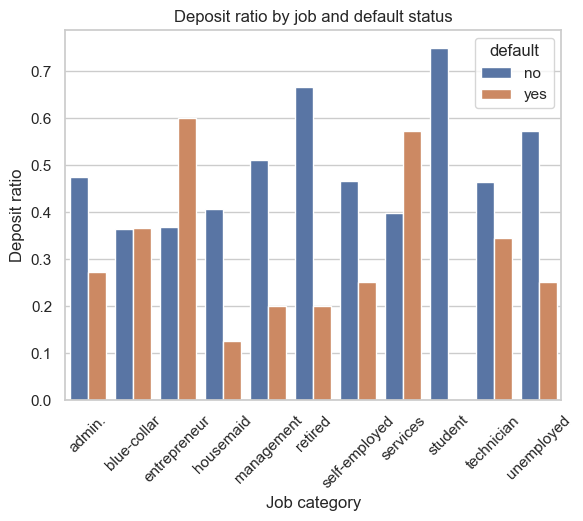

In [18]:
add_factor_to_deposit_sum_by_job(bank,'default')

Interpretation: From the above we can see that students and retired people have a good credit history

              job  education  count  total  deposit_ratio
0          admin.    primary     12     42       0.285714
1          admin.  secondary    520   1124       0.462633
2          admin.   tertiary     99    168       0.589286
3     blue-collar    primary    218    694       0.314121
4     blue-collar  secondary    466   1202       0.387687
5     blue-collar   tertiary     24     48       0.500000
6    entrepreneur    primary     12     41       0.292683
7    entrepreneur  secondary     59    155       0.380645
8    entrepreneur   tertiary     52    132       0.393939
9       housemaid    primary     49    144       0.340278
10      housemaid  secondary     38     87       0.436782
11      housemaid   tertiary     22     43       0.511628
12     management    primary     25     73       0.342466
13     management  secondary    172    376       0.457447
14     management   tertiary   1138   2187       0.520348
15        retired    primary    178    277       0.642599
16        reti

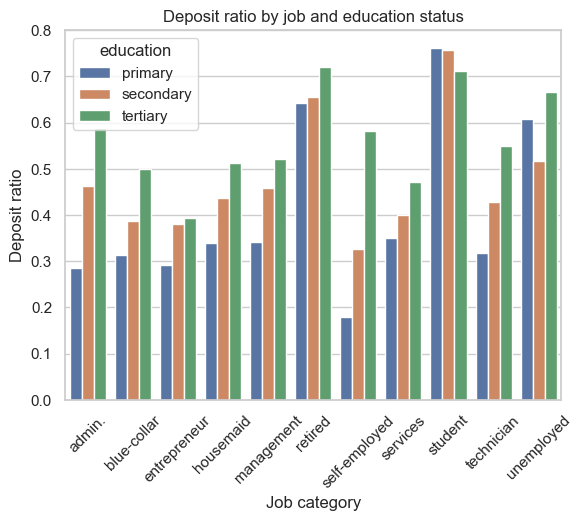

In [19]:
add_factor_to_deposit_sum_by_job(bank,'education')

Interpretation: Following the job distribution, single housemaid,self_employed and entrepreneur has much higher acceptance. Based on above analysis, we can see the student and retired are the term deposit target customer group, bank need to Develop specific campaigns for these two groups of customers.

#### check 'balance' distribution of depositing

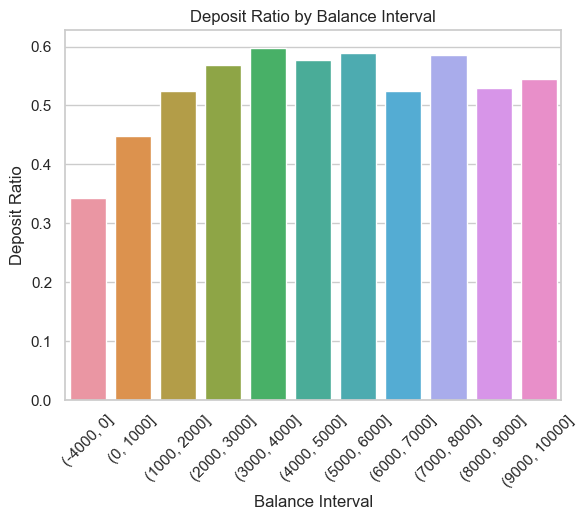

In [20]:
# Convert the "deposit" column to numeric values (0 or 1)
bank['deposit_num'] = bank['deposit'].map({'yes': 1, 'no': 0})

# Create balance intervals
bins = [-4000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Assign balance intervals to the new 'balance_bin' column
bank['balance_bin'] = pd.cut(bank['balance'], bins)

# Calculate the deposit ratio for each balance interval
deposit_ratio_by_balance = bank.groupby('balance_bin')['deposit_num'].mean().reset_index(name='deposit_ratio')

# Plot the deposit ratio by balance intervals
sns.barplot(x='balance_bin', y='deposit_ratio', data=deposit_ratio_by_balance)
plt.xlabel("Balance Interval")
plt.ylabel("Deposit Ratio")
plt.title("Deposit Ratio by Balance Interval")
plt.xticks(rotation=45)
plt.show()

Interpretation: these customers with ess than 1000 balance are not easy to deposit after campain

#### Check 'age' distribution of depositing

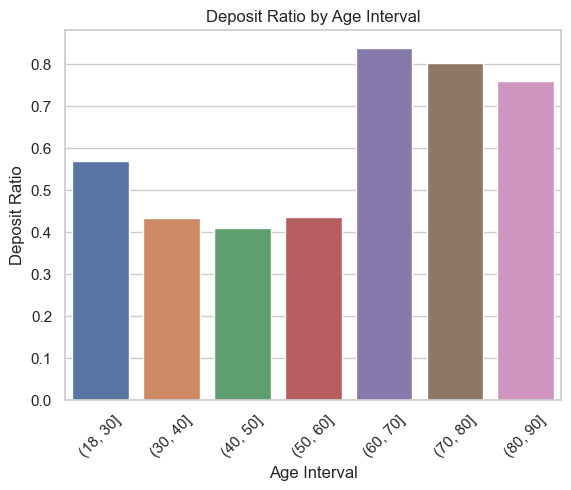

In [21]:
# Create age intervals
bins = [18, 30, 40, 50, 60, 70, 80, 90]

# Assign age intervals to the new 'age_bin' column
bank['age_bin'] = pd.cut(bank['age'], bins)

# Calculate the deposit ratio for each age interval
deposit_ratio_by_age = bank.groupby('age_bin')['deposit_num'].mean().reset_index(name='deposit_ratio')

# Plot the deposit ratio by age intervals
sns.barplot(x='age_bin', y='deposit_ratio', data=deposit_ratio_by_age)
plt.xlabel("Age Interval")
plt.ylabel("Deposit Ratio")
plt.title("Deposit Ratio by Age Interval")
plt.xticks(rotation=45)
plt.show()



Interpretation: Young people under 30 years old and customers over 60 years old have a higher proportion of deposits after accepting telemarketing

##### Further analyzing the correlation between balance and deposit result

In [22]:
def t_weightstates_on_feature(bank, column_name):
    """
    This function calculates and prints the mean values of the specified column for 
    deposits and no-deposits, and performs an independent t-test between them.
    
    Parameters:
    bank (pd.DataFrame): The bank marketing dataset in a pandas DataFrame.
    column_name (str): The name of the column for which the t-test should be performed.
    """
    
    # Filter out the specified column values for 'yes' and 'no' deposits
    deposit_balance = bank.loc[bank['deposit']=='yes', column_name]
    no_deposit_balance = bank.loc[bank['deposit']=='no', column_name]   
    
    # Print the mean values
    print(f"The mean {column_name} of deposit is:    {np.mean(deposit_balance)}")
    print(f"The mean {column_name} of no_deposit is: {np.mean(no_deposit_balance)}")
    
    # Perform an independent t-test
    t_stat, p_val, dof = weightstats.ttest_ind(deposit_balance, no_deposit_balance)
    
    # Print the results of the t-test
    print(f"The t-statistic is: {t_stat}")
    print(f"The p-value is: {p_val}")
    print(f"The degrees of freedom is: {dof}")
    
    return

In [23]:
t_weightstates_on_feature(bank,'balance')

The mean balance of deposit is:    1804.2679145396105
The mean balance of no_deposit is: 1280.2271411544355
The t-statistic is: 8.598842126021882
The p-value is: 9.126568254858151e-18
The degrees of freedom is: 11160.0


Interpretation：Since the P-value is smaller than 0.05,is statistically significant. Therefore, balance is a key factor to influecne the customer to accept the campaign

#### Further analyzing the correlation between age and outcome

In [24]:
t_weightstates_on_feature(bank,'age')

The mean age of deposit is:    41.670069956513515
The mean age of no_deposit is: 40.83739145240933
The t-statistic is: 3.6892130272779933
The p-value is: 0.0002260180059079674
The degrees of freedom is: 11160.0


Interpretation: Since the P-value is smaller than 0.05,is statistically significant.Therefore, age is also a key factor to influecne the customer to accept the campaign

##  Predictive Models (Statistical/Predictive Analysis) 


Models:
Classification Models: 
1.Decision Trees: Each branch of the tree represents each of the possible factors that influence whether a customer will make a subsequent term deposit.
2. Random Forest: Random decision forest is a method that runs by constructing multiple decision trees in training dataset. Most of the trees' decisions are selected as the final decision.
3.Naive Bayes: Analyze the most likely factors affecting the result.






### Model 1 (Random forest )
Random decision forest is a method that runs by constructing multiple decision trees in training dataset. Most of the trees' decisions are selected as the final decision.

It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.
It is also considered as a very handy and easy to use algorithm, because it’s default hyper-parameters often produce a good prediction result.




Same as previous numerical data process, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. In this part, we will use OneHotEncoder() provided by sklearn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder 

# Create a dictionary to map education levels to ordinal values
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}

# Replace the original education levels with ordinal values
bank['education'] = bank['education'].replace(education_mapping)

# Encoding the other categorical features with OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoded_features = onehot_encoder.fit_transform(bank[['job', 'marital', 'default','loan','housing']])

# Combine the encoded 'education' feature with the one-hot encoded features
encoded_features = pd.concat([bank['education'].reset_index(drop=True),
                              pd.DataFrame(onehot_encoded_features.toarray(),
                                           columns=onehot_encoder.get_feature_names_out(['job', 'marital', 'default','loan','housing']))
                              .reset_index(drop=True)], axis=1)

# Combine encoded categorical features with numerical features
X = pd.concat([bank[['age', 'balance']].reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)

X.sample(10)


,age,balance,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,loan_no,loan_yes,housing_no,housing_yes
5628,39,208,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8307,39,522,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1343,65,715,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9368,39,2715,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2471,42,190,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6171,29,910,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9984,56,292,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
10615,40,1844,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
295,49,361,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3304,64,1644,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


we will split our data into two dataset, training and testing. In this case because we have enough data we will split the data with ratio of 70:30 for training and testing respectively. This will result in our training data having 7813 rows and 3349 rows for the testing data.

In [26]:
# Set the target variable
Y = bank['deposit'].map({'yes': 1, 'no': 0})

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3)
X_train.shape

(7813, 23)

In [27]:
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', Y_train.shape)
print('Shape of testing label:', Y_test.shape)

Shape of training feature: (7813, 23)
Shape of testing feature: (3349, 23)
Shape of training label: (7813,)
Shape of testing label: (3349,)


In [28]:
# Create and fit the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)



RandomForestClassifier(random_state=0)

In [29]:
# Make predictions
Y_test_prediction = rf.predict(X_test)


In [30]:
def evaluate_model(model, X_test, Y_test):
    """
    This function evaluates the performance of a given model on the test data.
    
    Parameters:
    model (Model object): The machine learning model to be evaluated.
    X_test (DataFrame or ndarray): The test input data.
    Y_test (DataFrame or ndarray): The test target data.
    
    Returns:
    dict: A dictionary containing various performance metrics.
    """
    
    from sklearn import metrics

    # Predict Test Data 
    Y_prediction = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(Y_test, Y_prediction)  # Accuracy
    prec = metrics.precision_score(Y_test, Y_prediction)  # Precision
    rec = metrics.recall_score(Y_test, Y_prediction)  # Recall
    f1 = metrics.f1_score(Y_test, Y_prediction)  # F1-score
    kappa = metrics.cohen_kappa_score(Y_test, Y_prediction)  # Kappa score

    # Calculate area under curve (AUC)
    Y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)  # ROC curve components
    auc = metrics.roc_auc_score(Y_test, Y_pred_proba)  # AUC

    # Display confusion matrix
    cm = metrics.confusion_matrix(Y_test, Y_prediction)  # Confusion matrix

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
     

implement out evaluation model into our ramdom forest model

In [31]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, Y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])
     


Accuracy: 0.6303374141534787
Precision: 0.6173913043478261
Recall: 0.5808684707363121
F1 Score: 0.5985732814526589
Cohens Kappa Score: 0.25660590625485236
Area Under Curve: 0.6712186766977515
Confusion Matrix:
 [[1188  572]
 [ 666  923]]


### Model 2 (Decision Trees)
Each branch of the tree represents each of the possible factors that influence whether a customer will make a subsequent term deposit.

Easy to construct,
Extremely fast at classifying unknown records,
Easy to interpret for small-sized trees,
Accuracy is comparable to other classification techniques for many simple data sets.

In [32]:

from sklearn import tree

# Building Decision Tree model 
decision_tree= tree.DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, Y_train)
     


DecisionTreeClassifier(random_state=0)

In [33]:
# Evaluate Tree Model
dtc_eval = evaluate_model(decision_tree, X_test, Y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.5954016124216184
Precision: 0.5734002509410289
Recall: 0.5752045311516677
F1 Score: 0.5743009739239711
Cohens Kappa Score: 0.18881203260200186
Area Under Curve: 0.5978152354253676
Confusion Matrix:
 [[1080  680]
 [ 675  914]]


### Model 3 (Naive Bayes)

Naive Bayes is a simple technique for constructing classifier.It assumes that each attribute is independent, and it gives each attribute the same level of importance, which allows us to calculate the probability that each specific attribute has an impact on our target output

In [34]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, Y_train)
     

GaussianNB()

In [35]:
# Evaluate Model
nb_eval = evaluate_model(Naive_Bayes, X_test, Y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6151089877575395
Precision: 0.5903614457831325
Recall: 0.6167400881057269
F1 Score: 0.603262542320714
Cohens Kappa Score: 0.2298774703987444
Area Under Curve: 0.6425610732879455
Confusion Matrix:
 [[1080  680]
 [ 609  980]]


### Model camparision
After building all of our model, we can now compare how well each model perform. To do this we will create a line chart to show the AUC of all our models.

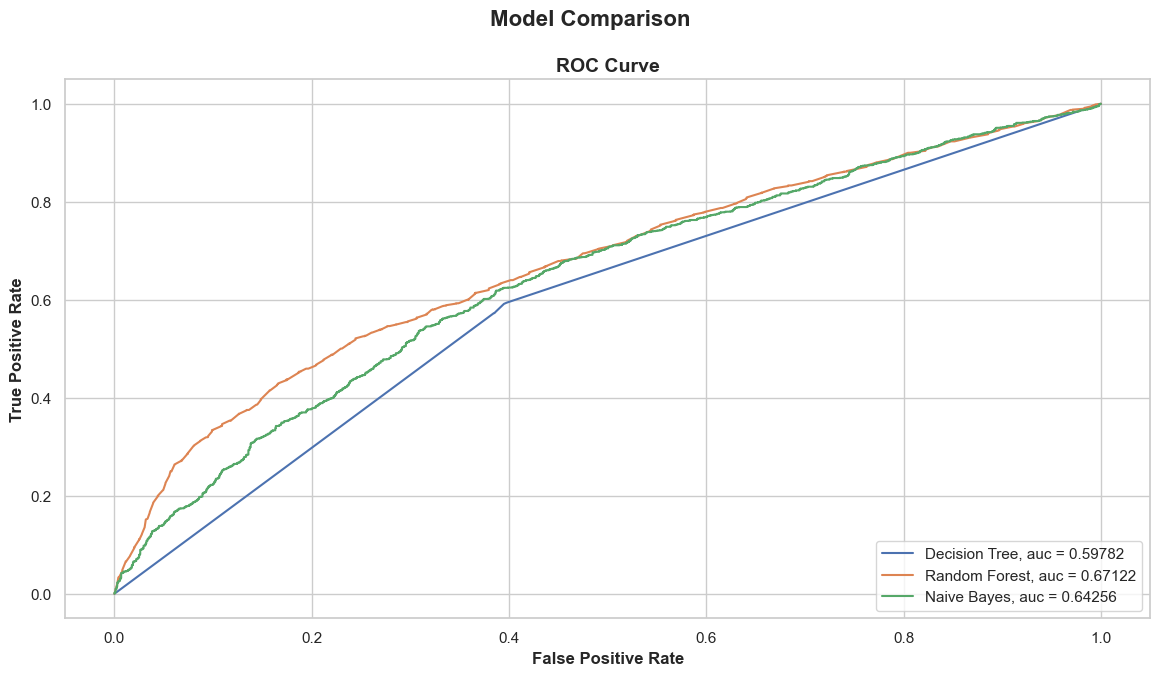

In [36]:
# Intitialize figure with two plots
fig, (auc) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## Comparing ROC Curve
auc.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
auc.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
auc.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))


## Configure x and y axis
auc.set_xlabel('False Positive Rate', fontweight='bold')
auc.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
auc.set_title('ROC Curve', fontsize=14, fontweight='bold')
auc.legend(loc=4)

plt.show()

### Conclusion
In this dataset analysis project, we conducted an in-depth exploration and analysis of the bank marketing dataset, aiming to predict whether customers would make deposits in future marketing campaigns. We started by preprocessing and visually analyzing the data to understand the relationships between various features and the target variable. We discovered the following interesting insights about the dataset:

1. Students, retired, and the unemployed are the most likely to be influenced by marketing to make deposits, and they remain the primary term depositors even when other variables are in play. Especially for students and retired groups, banks need to develop specific campaigns for these two groups of customers, such as using effective tele-marketing for the retired group and online marketing campaigns for students，or run specific campaigns on campus.
2. Individuals with higher education levels are more likely to make deposits after bank marketing.
3. Single customers have a slightly higher tendency to deposit compared to divorced and married customers.


We then experimented with various machine learning algorithms, such as random forests, decision trees, and naive Bayes, to build predictive models. By evaluating the performance of different models, we found that the random forest model performed slightly better, achieving an accuracy of 0.63, auc value 0.67 and good performance in terms of precision and recall. So we can assume that Random Forest is the right choice to solve our problem. However, there is still room for improvement, and further model optimization and parameter tuning are needed to reduce missed detections.

In conclusion, this project provides a basic framework for analyzing and predicting whether customers will make deposits in future bank marketing campaigns. Although our model still has some shortcomings, it offers us a solid starting point. To improve model performance, we can explore more feature engineering techniques, thereby providing banks with more effective customer predictions and ultimately enhancing the success rate and profitability of marketing campaigns.